In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [127]:
df = pd.read_csv("insurance_data.csv")
df.shape

(28, 3)

In [128]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [129]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop("bought_insurance",axis = "columns"), df["bought_insurance"], test_size= 0.2, random_state=42)

In [130]:
X_train.head()

,age,affordibility
17,58,1
22,40,1
11,28,1
13,29,0
15,55,1


In [131]:
X_train_scaled =  X_train.copy()
X_train_scaled["age"] = X_train_scaled["age"]/100
X_train_scaled.head()

,age,affordibility
17,0.58,1
22,0.40,1
11,0.28,1
13,0.29,0
15,0.55,1


In [132]:
X_test_scaled =  X_test.copy()
X_test_scaled["age"] = X_test_scaled["age"]/100
X_test_scaled.head()

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1


In [133]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (2,), activation="sigmoid", kernel_initializer = "ones", bias_initializer= "zeros")
])

model.compile(optimizer="adam", loss= "binary_crossentropy", metrics = ["accuracy"])

C:\Users\niraj.meshram\AppData\Local\miniconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train_scaled, y_train, epochs=5000)

In [135]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 1.0000 - loss: 0.2647


[0.26470300555229187, 1.0]

In [136]:
X_test_scaled

,age,affordibility
9,0.61,1
25,0.54,1
8,0.62,1
21,0.26,0
0,0.22,1
12,0.27,0


In [137]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.81626713],
       [0.7576754 ],
       [0.8236742 ],
       [0.18819511],
       [0.38559136],
       [0.1959822 ]], dtype=float32)

In [138]:
y_test

9     1
25    1
8     1
21    0
0     0
12    0
Name: bought_insurance, dtype: int64

In [139]:
coef, intercept = model.get_weights()
coef, intercept

(array([[5.0183096],
        [1.1966311]], dtype=float32),
 array([-2.7665412], dtype=float32))

In [140]:
def sigmoid(x):
    import math
    return 1/(1 + math.exp(-x))

sigmoid(18)

0.9999999847700205

In [141]:
def prediction_function(age, affordability):
    weighted_sum = (coef[0] * age) + (coef[1] * affordability) + intercept
    return sigmoid(weighted_sum)

prediction_function(0.61, 1)

C:\Users\niraj.meshram\AppData\Local\Temp\ipykernel_11012\2846854446.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1/(1 + math.exp(-x))


0.8162671453430502

In [147]:
def log_loss(y_truth, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i, epsilon) for i in y_predicted]
    y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_truth*np.log(y_predicted_new) + (1-y_truth)*np.log(1-y_predicted_new))

In [148]:
def sigmoid_numpy(x):
    return 1/(1+np.exp(-x))

In [144]:
def gradient_descent(age, affordability, y_truth, epochs):
    w1 = w2 = 1
    bias = 0 
    learning_rate = 0.5
    n = len(age)
    previous_loss = float('inf')   # Start with a large value
    threshold = 1e-6 
    loss_history = []
    
    for i in range(epochs):
        weighted_sum = w1*age + w2*affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        
        loss = log_loss(y_truth,y_predicted)
        loss_history.append(loss)
        
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_truth))
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_truth))

        bias_d = np.mean(y_predicted-y_truth)

        w1 = w1 - learning_rate * w1d
        w2 = w2 - learning_rate * w2d
        bias = bias - learning_rate * bias_d

        if i%100 == 0:
            print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
        # Early stopping condition based on loss convergence
        if abs(previous_loss - loss) < threshold:
            print(f"Converged at epoch {i} with loss: {loss}")
            break

        previous_loss = loss  # Update previous loss
        
        
        # Plotting loss vs epochs
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.title("Loss Convergence Over Epochs")
    plt.grid(True)
    plt.show()
    return  w1, w2, bias

Epoch:0, w1:0.9736899318847281, w2:0.931388810977659, bias:-0.11748951666770448, loss:0.7428288579142563
Epoch:100, w1:2.2281870363373972, w2:1.021207570480777, bias:-1.5219348336892933, loss:0.5674253359204207
Epoch:200, w1:3.473286412049912, w2:1.1354958313845407, bias:-2.109494376761035, loss:0.5289749850551891
Epoch:300, w1:4.506491403088423, w2:1.1967920767703706, bias:-2.570834600613761, loss:0.5031414005690805
Epoch:400, w1:5.365041991551451, w2:1.2491715720776855, bias:-2.956078966702517, loss:0.48528128420193234
Epoch:500, w1:6.0852826923427665, w2:1.2986714389005876, bias:-3.284483396218944, loss:0.4726393764170826
Epoch:600, w1:6.695812063656752, w2:1.3454878194603157, bias:-3.567457988806263, loss:0.4634988487013096
Epoch:700, w1:7.2183274027939035, w2:1.3892512321620898, bias:-3.813203852443413, loss:0.4567649749292064
Epoch:800, w1:7.669313565573731, w2:1.4297715309909391, bias:-4.02801181481297, loss:0.45172256135033406
Epoch:900, w1:8.061437765956871, w2:1.4670499223596

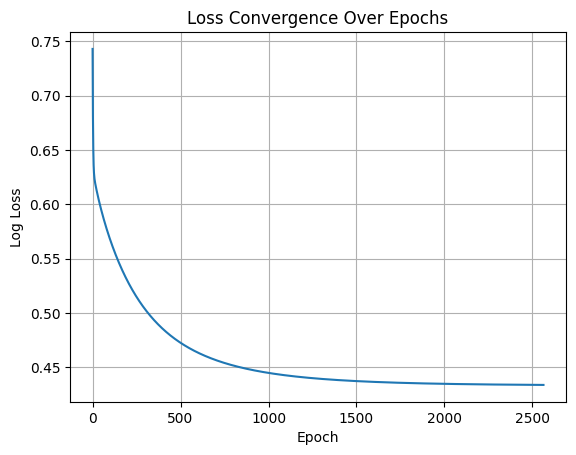

(np.float64(10.768544154856258),
 np.float64(1.7725643506273523),
 np.float64(-5.57109971145959))

In [145]:
gradient_descent(X_train_scaled["age"], X_train_scaled["affordibility"], y_train,5000)